In [59]:
# Import helpful libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [60]:
#Import dataframe
df = pd.read_csv('C:/Users/flatt/OneDrive/spaceship_titanic_train.csv')

#Print information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [61]:
#Print the first several lines of the dataframe
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:xlabel='Transported', ylabel='count'>

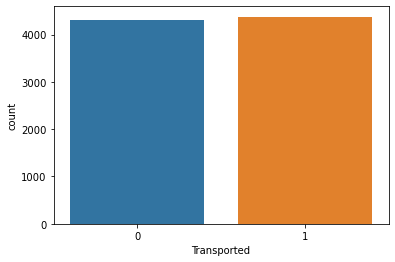

In [62]:
#Must create our label, which is if the passenger was transported or not.
#Since df.info() tells us that 'Transported' is a boolean object, let's convert
#it to an integer value before defining our label.

#0 if False, 1 if True, 2 if NaN (works for VIP and CryoSleep columns as well)
def boolean_to_int(results):
    binary_results = []
    for result in results:
        if (result == False):
            binary_results.append(0)
        elif (result == True):
            binary_results.append(1)
        else: #Value is NaN
            binary_results.append(2)
    return binary_results

#Change 'Transported' to a binary representation (0 is no, 1 is yes)
results = np.array(df['Transported'])
transported_binary = boolean_to_int(results)
df['Transported'] = transported_binary

#Define our label
y = df.Transported

#See the distrubution of our label
sns.countplot(x='Transported', data=df)

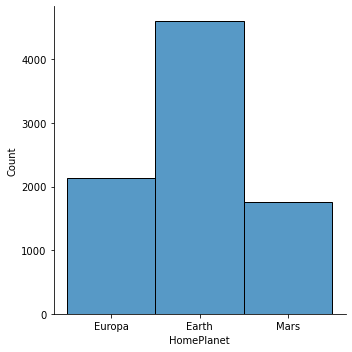

In [63]:
#See the distrubution of home planets
sns.displot(x='HomePlanet', data=df)

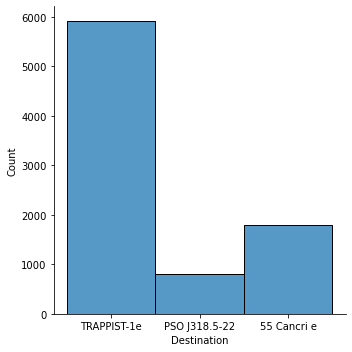

In [64]:
sns.displot(x='Destination', data=df)

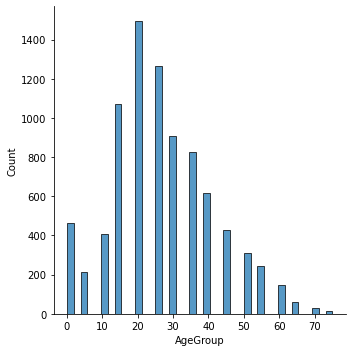

In [65]:
#Fill NaN's in 'Age' column with average age
ag = np.array(df['Age'])
df['Age'].fillna(np.mean(ag), inplace=True)

#Makes the age an interval of 5
df['AgeGroup'] = (df['Age'] // 5) * 5

#See the distribution of ages on the ship
sns.displot(x='AgeGroup', data=df)

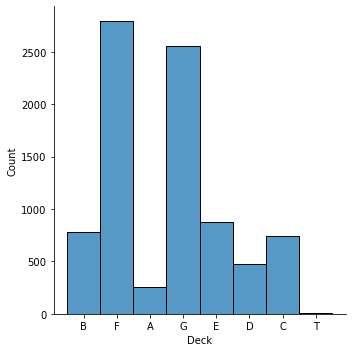

In [66]:
#Divide the Cabin into deck, num, and side
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', n=2, expand=True)

#See the dsitribution of people on each deck
sns.displot(x='Deck', data=df)

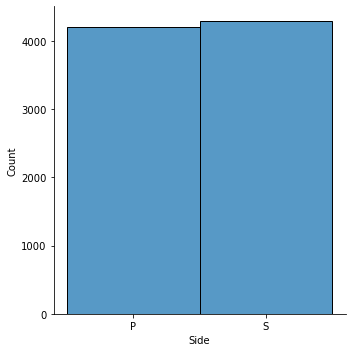

In [67]:
#See the dsitribution of people on each deck
sns.displot(x='Side', data=df)

In [68]:
#The first 4 digits of an ID is the group the person is traveling with.
passengerid = df['PassengerId'].str.split('_', n=1, expand=True)
groups = passengerid[0]
df['Group'] = groups

#See the distrubution of groups
groups.describe()

count     8693
unique    6217
top       4498
freq         8
Name: 0, dtype: object

In [69]:
#Convert other features to useful numerical values for this dataset:

df['VIP'] = boolean_to_int(df['VIP'])
df['CryoSleep'] = boolean_to_int(df['CryoSleep'])

#0 if Earth, 1 if Mars, 2 if Europa, 3 if NaN
def planet_to_int(planets):
    results = []
    for planet in planets:
        if (planet == 'Earth'):
            results.append(0)
        elif (planet == 'Mars'):
            results.append(1)
        elif (planet == 'Europa'):
            results.append(2)
        else: #NaN
            results.append(3)
    return results

#0 if TRAPPIST-1e, 1 if PSO J318.5-22, 2 if 55 Cancri e, 3 if NaN
def dest_to_int(dests):
    results = []
    for dest in dests:
        if (dest == 'TRAPPIST-1e'):
            results.append(0)
        elif (dest == 'PSO J318.5-22'):
            results.append(1)
        elif (dest == '55 Cancri e'):
            results.append(2)
        else: #NaN
            results.append(3)
    return results

#0 if P, 1 if S, 2 if NaN
def side_to_int(dests):
    results = []
    for dest in dests:
        if (dest == 'P'):
            results.append(0)
        elif (dest == 'S'):
            results.append(1)
        else: #NaN
            results.append(2)
    return results

df['HomePlanetID'] = planet_to_int(df['HomePlanet'])
df['DestinationID'] = dest_to_int(df['Destination'])
df['SideID'] = side_to_int(df['Side'])

#Use LabelEncoder for Deck
le = LabelEncoder()
deckID = le.fit_transform(df['Deck'])
df['DeckID'] = deckID

#Use LabelEncoder for Num
le = LabelEncoder()
numID = le.fit_transform(df['Num'])
df['NumID'] = numID

#Use LabelEncoder for Group
le = LabelEncoder()
groupID = le.fit_transform(df['Group'])
df['GroupID'] = groupID


df = df[['PassengerId', 'GroupID', 'HomePlanetID', 'DestinationID', 'DeckID' ,'NumID' ,'SideID', 'CryoSleep', 'VIP',
       'Age', 'AgeGroup', 'RoomService', 'VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'Transported']]
df.head()

,PassengerId,GroupID,HomePlanetID,DestinationID,DeckID,NumID,SideID,CryoSleep,VIP,Age,AgeGroup,RoomService,VRDeck,Spa,ShoppingMall,FoodCourt,Transported
0,0001_01,0,2,0,1,0,0,0,0,39.0,35.0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,1,0,0,5,0,1,0,0,24.0,20.0,109.0,44.0,549.0,25.0,9.0,1
2,0003_01,2,2,0,0,0,1,0,1,58.0,55.0,43.0,49.0,6715.0,0.0,3576.0,0
3,0003_02,2,2,0,0,0,1,0,0,33.0,30.0,0.0,193.0,3329.0,371.0,1283.0,0
4,0004_01,3,0,0,5,1,1,0,0,16.0,15.0,303.0,2.0,565.0,151.0,70.0,1


In [70]:
#Correlations based on the data cleaning already done
corr = df.corr()
corr

C:\Users\flatt\AppData\Local\Temp/ipykernel_29548/1260839614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,GroupID,HomePlanetID,DestinationID,DeckID,NumID,SideID,CryoSleep,VIP,Age,AgeGroup,RoomService,VRDeck,Spa,ShoppingMall,FoodCourt,Transported
GroupID,1.000000,0.002070,0.004539,-0.010348,-0.229919,-0.017187,-0.000556,0.014847,-0.009460,-0.010177,-0.000357,0.015465,-0.005151,0.017466,-0.009608,0.021825
HomePlanetID,0.002070,1.000000,0.125365,-0.737342,0.026826,0.036114,0.095221,0.057796,0.216884,0.216797,0.043023,0.220366,0.212006,0.025921,0.287120,0.179162
DestinationID,0.004539,0.125365,1.000000,-0.157579,0.022018,0.015795,0.065053,0.019466,0.012506,0.011139,-0.044962,0.062805,0.055406,-0.025527,0.098288,0.099737
DeckID,-0.010348,-0.737342,-0.157579,1.000000,0.044371,0.093644,0.021737,-0.060580,-0.232809,-0.231806,-0.016236,-0.245486,-0.204819,-0.034373,-0.306808,-0.109925
NumID,-0.229919,0.026826,0.022018,0.044371,1.000000,0.113086,0.003314,0.001273,-0.000702,0.000616,0.009281,0.004146,0.023599,-0.004945,0.007125,0.019015
SideID,-0.017187,0.036114,0.015795,0.093644,0.113086,1.000000,0.020462,0.005636,0.011879,0.012744,0.000398,-0.010366,0.012488,-0.023315,0.018352,0.093319
CryoSleep,-0.000556,0.095221,0.065053,0.021737,0.003314,0.020462,1.000000,-0.023407,-0.069141,-0.067112,-0.219033,-0.173856,-0.180362,-0.189642,-0.183855,0.404716
VIP,0.014847,0.057796,0.019466,-0.060580,0.001273,0.005636,-0.023407,1.000000,0.032874,0.034956,0.038368,0.054235,0.019832,-0.009756,0.055531,-0.014260
Age,-0.009460,0.216884,0.012506,-0.232809,-0.000702,0.011879,-0.069141,0.032874,1.000000,0.995195,0.068723,0.101007,0.123970,0.033133,0.130421,-0.075026
AgeGroup,-0.010177,0.216797,0.011139,-0.231806,0.000616,0.012744,-0.067112,0.034956,0.995195,1.000000,0.068976,0.100880,0.120778,0.033757,0.130291,-0.073815


In [71]:
#Correlations to being transported
tp = abs(corr['Transported'])
tp

GroupID          0.021825
HomePlanetID     0.179162
DestinationID    0.099737
DeckID           0.109925
NumID            0.019015
SideID           0.093319
CryoSleep        0.404716
VIP              0.014260
Age              0.075026
AgeGroup         0.073815
RoomService      0.244611
VRDeck           0.207075
Spa              0.221131
ShoppingMall     0.010141
FoodCourt        0.046566
Transported      1.000000
Name: Transported, dtype: float64

<AxesSubplot:xlabel='Transported', ylabel='count'>

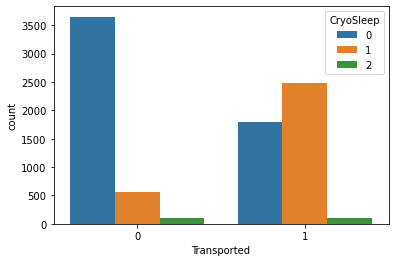

In [72]:
#Visualizing the strong correlation to CryoSleep and being transported
sns.countplot(x='Transported', data=df, hue='CryoSleep')

<AxesSubplot:xlabel='SpentMoney', ylabel='count'>

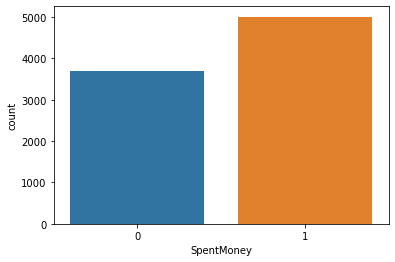

In [73]:
#Calculate total spending
spending = ['RoomService', 'VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt']
df['TotalSpending'] = df[spending].sum(axis=1)

#0 if a person spent less than $100, 1 if they spent $100 or more
def spent_money(spendings):
    spent_money = []
    for spent in spendings:
        if spent < 100:
            spent_money.append(0)
        else:
            spent_money.append(1) 
    return spent_money

#Make 'SpentMoney' a binary representation (0 is < $100, 1 is >= $100)
spendings = np.array(df['TotalSpending'])
spent_binary = spent_money(spendings)
df['SpentMoney'] = spent_binary

#See the distrubution of our label
sns.countplot(x='SpentMoney', data=df)

<AxesSubplot:xlabel='Transported', ylabel='count'>

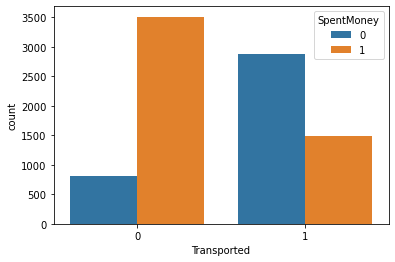

In [74]:
#See if there's a corrlation to spending and being transported
sns.countplot(x='Transported', data=df, hue='SpentMoney')

<AxesSubplot:xlabel='SpentAtVR', ylabel='count'>

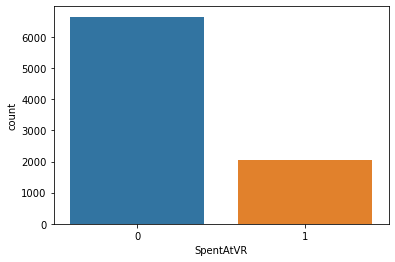

In [75]:
#Make 'SpentAtVR' a binary representation (0 is no, 1 is yes)
spendVR = np.array(df['VRDeck'])
spentVR_binary = spent_money(spendVR)
df['SpentAtVR'] = spentVR_binary

#See the distrubution of our label
sns.countplot(x='SpentAtVR', data=df)

<AxesSubplot:xlabel='Transported', ylabel='count'>

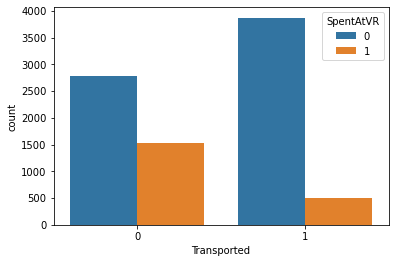

In [76]:
#See if there's a corrlation to spending at the VRDeck and being transported
sns.countplot(x='Transported', data=df, hue='SpentAtVR')

<AxesSubplot:xlabel='SpentAtRoom', ylabel='count'>

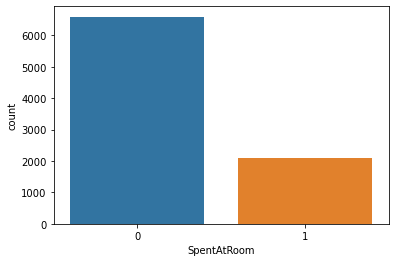

In [77]:
#Make 'SpentAtRoom' a binary representation (0 is no, 1 is yes)
spendings = np.array(df['RoomService'])
spent_binary = spent_money(spendings)
df['SpentAtRoom'] = spent_binary

#See the distrubution of our label
sns.countplot(x='SpentAtRoom', data=df)

<AxesSubplot:xlabel='Transported', ylabel='count'>

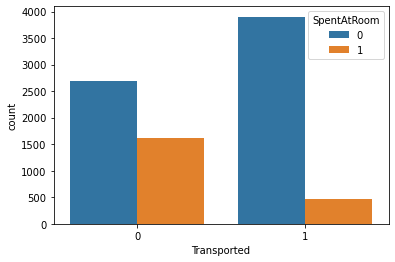

In [78]:
#See if there's a corrlation to spending on Room Services and being transported
sns.countplot(x='Transported', data=df, hue='SpentAtRoom')

<AxesSubplot:xlabel='SpentAtSpa', ylabel='count'>

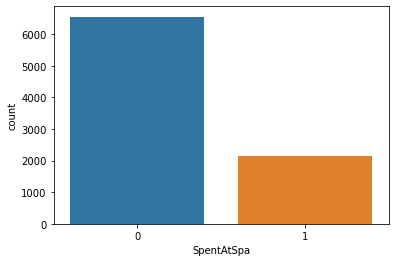

In [79]:
#Make 'SpentAtSpa' a binary representation (0 is no, 1 is yes)
spendVR = np.array(df['Spa'])
spentVR_binary = spent_money(spendVR)
df['SpentAtSpa'] = spentVR_binary

#See the distrubution of our label
sns.countplot(x='SpentAtSpa', data=df)

<AxesSubplot:xlabel='Transported', ylabel='count'>

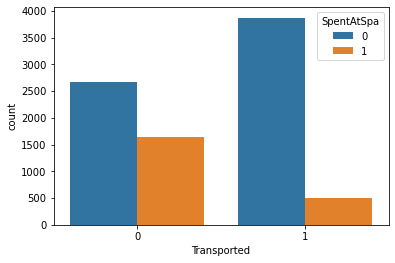

In [80]:
#See if there's a corrlation to spending at the spa and being transported
sns.countplot(x='Transported', data=df, hue='SpentAtSpa')

<AxesSubplot:xlabel='NumSpentOnImp', ylabel='count'>

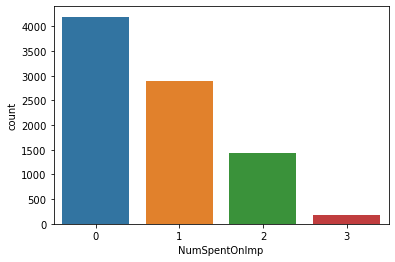

In [81]:
#'NumSpentOnImp' calcluates if you spent at the VR deck, on room service, and/or at the spa
imp_spending = ['SpentAtVR', 'SpentAtRoom', 'SpentAtSpa']
df['NumSpentOnImp'] = df[imp_spending].sum(axis=1)

sns.countplot(x='NumSpentOnImp', data=df)

<AxesSubplot:xlabel='NumSpentOnImp', ylabel='count'>

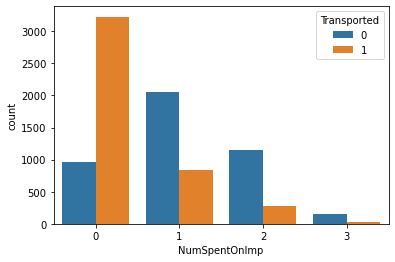

In [82]:
#See if there's a corrlation to spending of these specific features and being transported
sns.countplot(x='NumSpentOnImp', data=df, hue='Transported')

<AxesSubplot:>

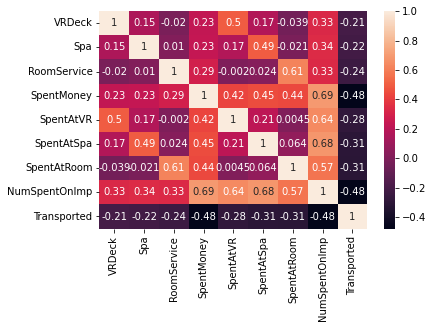

In [83]:
#Compare all of our spending features to being transported
spending_var = df[['VRDeck', 'Spa', 'RoomService', 'SpentMoney', 
                   'SpentAtVR', 'SpentAtSpa', 'SpentAtRoom', 'NumSpentOnImp', 'Transported']]

sns.heatmap(spending_var.corr(), annot=True)

In [84]:
#Lets see if there's any features correlated to spending
df_spending = df[['GroupID', 'HomePlanetID', 'DestinationID', 'DeckID' ,'NumID' ,'SideID', 'VIP',
                  'AgeGroup', 'SpentAtVR', 'SpentAtRoom', 'SpentAtSpa', 'SpentMoney', 'NumSpentOnImp']]

df_s_corr = df_spending.corr()

In [85]:
#Correlations to spending on VR deck
vr = abs(df_s_corr['SpentAtVR'])
vr

GroupID          0.000886
HomePlanetID     0.108625
DestinationID    0.027241
DeckID           0.172709
NumID            0.005867
SideID           0.009915
VIP              0.020918
AgeGroup         0.122364
SpentAtVR        1.000000
SpentAtRoom      0.004543
SpentAtSpa       0.209752
SpentMoney       0.424559
NumSpentOnImp    0.640294
Name: SpentAtVR, dtype: float64

In [86]:
#Correlations to spending on spa
spa = abs(df_s_corr['SpentAtSpa'])
spa

GroupID          0.010730
HomePlanetID     0.113364
DestinationID    0.012652
DeckID           0.168317
NumID            0.008948
SideID           0.002936
VIP              0.030507
AgeGroup         0.137974
SpentAtVR        0.209752
SpentAtRoom      0.064471
SpentAtSpa       1.000000
SpentMoney       0.447352
NumSpentOnImp    0.678581
Name: SpentAtSpa, dtype: float64

In [87]:
#Correlations to spending on room service
rm = abs(df_s_corr['SpentAtRoom'])
rm

GroupID          0.007376
HomePlanetID     0.063074
DestinationID    0.082126
DeckID           0.055264
NumID            0.004542
SideID           0.023230
VIP              0.019434
AgeGroup         0.092313
SpentAtVR        0.004543
SpentAtRoom      1.000000
SpentAtSpa       0.064471
SpentMoney       0.435081
NumSpentOnImp    0.567242
Name: SpentAtRoom, dtype: float64

In [88]:
#Correlations to spending in general
sm = abs(df_s_corr['SpentMoney'])
sm

GroupID          0.012701
HomePlanetID     0.081987
DestinationID    0.058605
DeckID           0.059376
NumID            0.012572
SideID           0.024711
VIP              0.028910
AgeGroup         0.225670
SpentAtVR        0.424559
SpentAtRoom      0.435081
SpentAtSpa       0.447352
SpentMoney       1.000000
NumSpentOnImp    0.692958
Name: SpentMoney, dtype: float64

In [89]:
#Correlations to spending on VR deck, spa, and room service
nsi = abs(df_s_corr['NumSpentOnImp'])
nsi

GroupID          0.002284
HomePlanetID     0.084211
DestinationID    0.022480
DeckID           0.151403
NumID            0.005455
SideID           0.015968
VIP              0.037602
AgeGroup         0.186933
SpentAtVR        0.640294
SpentAtRoom      0.567242
SpentAtSpa       0.678581
SpentMoney       0.692958
NumSpentOnImp    1.000000
Name: NumSpentOnImp, dtype: float64

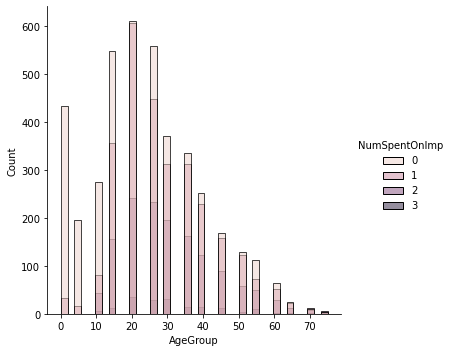

In [90]:
#Age group was correlated to spending, there may be correlations we didn't see before
sns.displot(x='AgeGroup', data=df, hue='NumSpentOnImp')

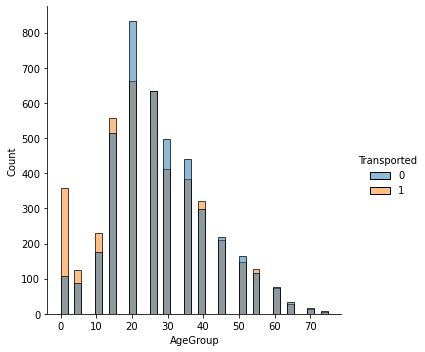

In [91]:
sns.displot(x='AgeGroup', data=df, hue='Transported')

<AxesSubplot:>

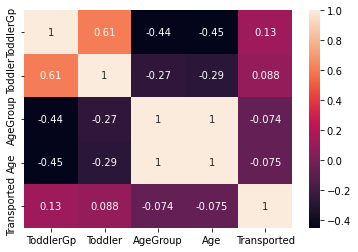

In [92]:
#Toddlers (0.0 age range) rarely spent money (which would make sense if they have a parent/guardian)
#and were much more likely to be transported than other age groups. Lets explore this further
def is_toddler(ag):
    toddler = []
    for a in ag:
        if (a == 0.0):
            toddler.append(1)
        else:
            toddler.append(0)
    return toddler

#Ages 0-4
df['ToddlerGp'] = is_toddler(df['AgeGroup'])
#Just age 0
df['Toddler'] = is_toddler(df['Age'])

toddler = df[['ToddlerGp', 'Toddler', 'AgeGroup', 'Age', 'Transported']]

sns.heatmap(toddler.corr(), annot=True)

In [93]:
#Create features to test
features = ['CryoSleep', 'ToddlerGp', 'NumSpentOnImp']
X = df[features]

In [94]:
# Specify models
lr = LogisticRegression()
svm = svm.SVC()

#Run cross-validation on both models
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print('Logistic Regression with X:\n' + str(scores) + '\n')

scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print('Support Vector Machine with X:\n' + str(scores) + '\n')

Logistic Regression with X:
[0.76078206 0.75445658 0.75790684 0.79056387 0.77157652]

Support Vector Machine with X:
[0.76595745 0.76078206 0.76193214 0.79286536 0.77617952]



In [289]:
from sklearn import svm
#Import test data for submission
test_df = pd.read_csv('C:/Users/flatt/OneDrive/spaceship_titanic_test.csv')

#Change 'CryoSleep' to a binary representation (0 is False, 1 is True)
sleep = np.array(test_df['CryoSleep'])
sleep_binary = boolean_to_int(sleep)
test_df['CryoSleep'] = sleep_binary

#Make 'SpentOnRoom' a binary representation (0 is no, 1 is yes)
spendings = np.array(test_df['RoomService'])
spent_binary = spent_money(spendings)
test_df['SpentAtRoom'] = spent_binary

#Make 'SpentOnVR' a binary representation (0 is no, 1 is yes)
spendings = np.array(test_df['VRDeck'])
spent_binary = spent_money(spendings)
test_df['SpentAtVR'] = spent_binary

#Make 'SpentOnSpa' a binary representation (0 is no, 1 is yes)
spendings = np.array(test_df['Spa'])
spent_binary = spent_money(spendings)
test_df['SpentAtSpa'] = spent_binary

#Make the 'NumSpentOnImp' feature
imp_spending = ['SpentAtVR', 'SpentAtRoom', 'SpentAtSpa']
test_df['NumSpentOnImp'] = test_df[imp_spending].sum(axis=1)

#Make 'ToddlerGp' a feature (0 is no, 1 is yes)
ag = np.array(test_df['Age'])
test_df['Age'].fillna(np.mean(ag), inplace=True)
test_df['AgeGroup'] = (test_df['Age'] // 5) * 5
test_df['ToddlerGp'] = is_toddler(test_df['AgeGroup'])


#Define our label
X_test = test_df[['CryoSleep', 'ToddlerGp', 'NumSpentOnImp']]

# Specify classifier model
clf = svm.SVC()
#Fit model with training data
clf.fit(X, y)

#Make predictions with X_test
predictions = clf.predict(X_test)

#Convert predictions back to boolean value for submission:
#False if 0, True if 1
def pred_to_boolean(preds):
    bool_preds = []
    for pred in preds:
        if (pred == 0):
            bool_preds.append(False)
        elif (pred == 1):
            bool_preds.append(True)
    return bool_preds

bool_preds = pred_to_boolean(predictions)

#Save predictions in format used for competition scoring
output = pd.DataFrame({'PassengerId': test_df.PassengerId,
                       'Transported': bool_preds})
output.to_csv('spaceship_titanic_survival_pred19.csv', index=False)